##### Copyright 2018 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");

In [ ]:
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Interaction Between Neurons - Feature Visualization

This notebook uses  [**Lucid**](https://github.com/tensorflow/lucid) to reproduce some of the results in [Feature Visualization](https://distill.pub/2017/feature-visualization/).

This notebook doesn't introduce the abstractions behind lucid; you may wish to also read the [Lucid tutorial](https://colab.research.google.com/github/tensorflow/lucid/blob/master/notebooks/tutorial.ipynb).

**Note**: The easiest way to use this tutorial is as a colab notebook, which allows you to dive in with no setup. We recommend you enable a free GPU by going:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

## Install, Import, Load Model

In [ ]:
# Install Lucid

!pip install --quiet "lucid>=0.3.11"
#!pip install --quiet --upgrade-strategy=only-if-needed git+https://github.com/tensorflow/lucid.git

In [3]:
# Imports

import numpy as np
import scipy.ndimage as nd
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [4]:
# Let's import a model from the Lucid modelzoo!

model = models.InceptionV1()
model.load_graphdef()

# Combining Objectives


<img src="https://storage.googleapis.com/lucid-static/feature-visualization/7.png" width="800"></img>

In [5]:
neuron1 = ('mixed4b_pre_relu', 111)     # large fluffy
# neuron1 = ('mixed3a_pre_relu', 139)   # pointilist
# neuron1 = ('mixed3b_pre_relu',  81)   # brush trokes
# neuron1 = ('mixed4a_pre_relu',  97)   # wavy
# neuron1 = ('mixed4a_pre_relu',  41)   # frames
# neuron1 = ('mixed4a_pre_relu', 479)   # B/W

neuron2 = ('mixed4a_pre_relu', 476)     # art
# neuron2 = ('mixed4b_pre_relu', 360)   # lattices
# neuron2 = ('mixed4b_pre_relu', 482)   # arcs
# neuron2 = ('mixed4c_pre_relu', 440)   # small fluffy
# neuron2 = ('mixed4d_pre_relu', 479)   # bird beaks
# neuron2 = ('mixed4e_pre_relu', 718)   # shoulders

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x13c0f8070>
512 740.9126



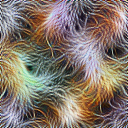

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x13c1972b0>
512 1262.2892



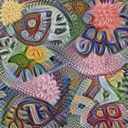

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x13c0d0c70>
512 1328.7725



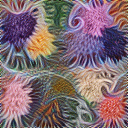

In [6]:
C = lambda neuron: objectives.channel(*neuron)

_ = render.render_vis(model, C(neuron1))
_ = render.render_vis(model, C(neuron2))
_ = render.render_vis(model, C(neuron1) + C(neuron2))

# Random Directions


<img src="https://storage.googleapis.com/lucid-static/feature-visualization/8.png" width="800"></img>

Unfortunately, constraints on ImageNet mean we can't provide an easy way for you to reproduce the dataset examples. However, we can reproduce the random directions, although since they're random, you'll get a different result each time (and they won't match the ones in the article).

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x13c2843d0>
512 16633.68



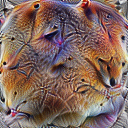

In [7]:
obj = objectives.direction("mixed4d_pre_relu", np.random.randn(528))
_ = render.render_vis(model, obj)

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x13c0d0880>
512 63639.863



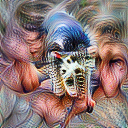

In [8]:
random_direction = np.random.random([528])
obj = lambda neuron: objectives.direction_neuron(*neuron)
_ = render.render_vis(model, obj(("mixed4d_pre_relu",random_direction)))

# Aligned Interpolation


<img src="https://storage.googleapis.com/lucid-static/feature-visualization/9.png" width="800"></img>

We hope to explore and explain this trick in more detail in an upcoming article.

render vis graph: <tensorflow.python.framework.ops.Graph object at 0x13d541b50>
512 7058.81



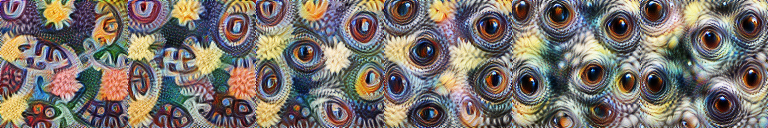

In [9]:
def interpolate_param_f():
    unique = param.fft_image((6, 128, 128, 3))
    shared = [
        param.lowres_tensor((6, 128, 128, 3), (1, 128//2, 128//2, 3)),
        param.lowres_tensor((6, 128, 128, 3), (1, 128//4, 128//4, 3)),
        param.lowres_tensor((6, 128, 128, 3), (1, 128//8, 128//8, 3)),
        param.lowres_tensor((6, 128, 128, 3), (2, 128//8, 128//8, 3)),
        param.lowres_tensor((6, 128, 128, 3), (1, 128//16, 128//16, 3)),
        param.lowres_tensor((6, 128, 128, 3), (2, 128//16, 128//16, 3)),
    ]
    return param.to_valid_rgb(unique + sum(shared), decorrelate=True)

obj = objectives.channel_interpolate("mixed4a_pre_relu", 476, "mixed4a_pre_relu", 460)

_ = render.render_vis(model, obj, interpolate_param_f)